In [28]:
import tensorflow as tf
from mtcnn.mtcnn import MTCNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Lambda, Flatten, Dense
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
K.set_image_data_format('channels_last')
import os
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
import PIL

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### import pretrained model from json file

In [2]:
from tensorflow.keras.models import model_from_json

json_file = open('keras-facenet-2-h5/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('keras-facenet-2-h5/model.h5')

In [29]:
model = tf.keras.models.load_model('model/facenet_keras.h5')

In [29]:
from inception_resnet_v1 import *
model = InceptionResNetV1(weights_path='weights/facenet_keras_weights.h5')

In [30]:
model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv2d_1a_3x3 (Conv2D)         (None, 79, 79, 32)   864         ['input_1[0][0]']                
                                                                                                  
 Conv2d_1a_3x3_BatchNorm (Batch  (None, 79, 79, 32)  96          ['Conv2d_1a_3x3[0][0]']          
 Normalization)                                                                                   
                                                                                

 on)                                                                                              
                                                                                                  
 Block35_1_Branch_1_Conv2d_0a_1  (None, 17, 17, 32)  0           ['Block35_1_Branch_1_Conv2d_0a_1x
 x1_Activation (Activation)                                      1_BatchNorm[0][0]']              
                                                                                                  
 Block35_1_Branch_2_Conv2d_0b_3  (None, 17, 17, 32)  0           ['Block35_1_Branch_2_Conv2d_0b_3x
 x3_Activation (Activation)                                      3_BatchNorm[0][0]']              
                                                                                                  
 Block35_1_Branch_0_Conv2d_1x1   (None, 17, 17, 32)  8192        ['Conv2d_4b_3x3_Activation[0][0]'
 (Conv2D)                                                        ]                                
          

 (Conv2D)                                                                                         
                                                                                                  
 Block35_2_Branch_1_Conv2d_0b_3  (None, 17, 17, 32)  9216        ['Block35_2_Branch_1_Conv2d_0a_1x
 x3 (Conv2D)                                                     1_Activation[0][0]']             
                                                                                                  
 Block35_2_Branch_2_Conv2d_0c_3  (None, 17, 17, 32)  9216        ['Block35_2_Branch_2_Conv2d_0b_3x
 x3 (Conv2D)                                                     3_Activation[0][0]']             
                                                                                                  
 Block35_2_Branch_0_Conv2d_1x1_  (None, 17, 17, 32)  96          ['Block35_2_Branch_0_Conv2d_1x1[0
 BatchNorm (BatchNormalization)                                  ][0]']                           
          

 BatchNorm (BatchNormalization)                                  ][0]']                           
                                                                                                  
 Block35_3_Branch_1_Conv2d_0b_3  (None, 17, 17, 32)  96          ['Block35_3_Branch_1_Conv2d_0b_3x
 x3_BatchNorm (BatchNormalizati                                  3[0][0]']                        
 on)                                                                                              
                                                                                                  
 Block35_3_Branch_2_Conv2d_0c_3  (None, 17, 17, 32)  96          ['Block35_3_Branch_2_Conv2d_0c_3x
 x3_BatchNorm (BatchNormalizati                                  3[0][0]']                        
 on)                                                                                              
                                                                                                  
 Block35_3

                                                                                                  
 Block35_4_Branch_0_Conv2d_1x1_  (None, 17, 17, 32)  0           ['Block35_4_Branch_0_Conv2d_1x1_B
 Activation (Activation)                                         atchNorm[0][0]']                 
                                                                                                  
 Block35_4_Branch_1_Conv2d_0b_3  (None, 17, 17, 32)  0           ['Block35_4_Branch_1_Conv2d_0b_3x
 x3_Activation (Activation)                                      3_BatchNorm[0][0]']              
                                                                                                  
 Block35_4_Branch_2_Conv2d_0c_3  (None, 17, 17, 32)  0           ['Block35_4_Branch_2_Conv2d_0c_3x
 x3_Activation (Activation)                                      3_BatchNorm[0][0]']              
                                                                                                  
 Block35_4

                                                                                                  
 Block35_5_Concatenate (Concate  (None, 17, 17, 96)  0           ['Block35_5_Branch_0_Conv2d_1x1_A
 nate)                                                           ctivation[0][0]',                
                                                                  'Block35_5_Branch_1_Conv2d_0b_3x
                                                                 3_Activation[0][0]',             
                                                                  'Block35_5_Branch_2_Conv2d_0c_3x
                                                                 3_Activation[0][0]']             
                                                                                                  
 Block35_5_Conv2d_1x1 (Conv2D)  (None, 17, 17, 256)  24832       ['Block35_5_Concatenate[0][0]']  
                                                                                                  
 Block35_5

 Block17_1_Branch_1_Conv2d_0b_1  (None, 8, 8, 128)   0           ['Block17_1_Branch_1_Conv2d_0b_1x
 x7_Activation (Activation)                                      7_BatchNorm[0][0]']              
                                                                                                  
 Block17_1_Branch_0_Conv2d_1x1   (None, 8, 8, 128)   114688      ['Mixed_6a[0][0]']               
 (Conv2D)                                                                                         
                                                                                                  
 Block17_1_Branch_1_Conv2d_0c_7  (None, 8, 8, 128)   114688      ['Block17_1_Branch_1_Conv2d_0b_1x
 x1 (Conv2D)                                                     7_Activation[0][0]']             
                                                                                                  
 Block17_1_Branch_0_Conv2d_1x1_  (None, 8, 8, 128)   384         ['Block17_1_Branch_0_Conv2d_1x1[0
 BatchNorm

                                                                                                  
 Block17_2_Activation (Activati  (None, 8, 8, 896)   0           ['Block17_2_ScaleSum[0][0]']     
 on)                                                                                              
                                                                                                  
 Block17_3_Branch_1_Conv2d_0a_1  (None, 8, 8, 128)   114688      ['Block17_2_Activation[0][0]']   
 x1 (Conv2D)                                                                                      
                                                                                                  
 Block17_3_Branch_1_Conv2d_0a_1  (None, 8, 8, 128)   384         ['Block17_3_Branch_1_Conv2d_0a_1x
 x1_BatchNorm (BatchNormalizati                                  1[0][0]']                        
 on)                                                                                              
          

 BatchNorm (BatchNormalization)                                  ][0]']                           
                                                                                                  
 Block17_4_Branch_1_Conv2d_0c_7  (None, 8, 8, 128)   384         ['Block17_4_Branch_1_Conv2d_0c_7x
 x1_BatchNorm (BatchNormalizati                                  1[0][0]']                        
 on)                                                                                              
                                                                                                  
 Block17_4_Branch_0_Conv2d_1x1_  (None, 8, 8, 128)   0           ['Block17_4_Branch_0_Conv2d_1x1_B
 Activation (Activation)                                         atchNorm[0][0]']                 
                                                                                                  
 Block17_4_Branch_1_Conv2d_0c_7  (None, 8, 8, 128)   0           ['Block17_4_Branch_1_Conv2d_0c_7x
 x1_Activa

                                                                                                  
 Block17_6_Branch_1_Conv2d_0a_1  (None, 8, 8, 128)   0           ['Block17_6_Branch_1_Conv2d_0a_1x
 x1_Activation (Activation)                                      1_BatchNorm[0][0]']              
                                                                                                  
 Block17_6_Branch_1_Conv2d_0b_1  (None, 8, 8, 128)   114688      ['Block17_6_Branch_1_Conv2d_0a_1x
 x7 (Conv2D)                                                     1_Activation[0][0]']             
                                                                                                  
 Block17_6_Branch_1_Conv2d_0b_1  (None, 8, 8, 128)   384         ['Block17_6_Branch_1_Conv2d_0b_1x
 x7_BatchNorm (BatchNormalizati                                  7[0][0]']                        
 on)                                                                                              
          

 x1_Activation (Activation)                                      1_BatchNorm[0][0]']              
                                                                                                  
 Block17_7_Concatenate (Concate  (None, 8, 8, 256)   0           ['Block17_7_Branch_0_Conv2d_1x1_A
 nate)                                                           ctivation[0][0]',                
                                                                  'Block17_7_Branch_1_Conv2d_0c_7x
                                                                 1_Activation[0][0]']             
                                                                                                  
 Block17_7_Conv2d_1x1 (Conv2D)  (None, 8, 8, 896)    230272      ['Block17_7_Concatenate[0][0]']  
                                                                                                  
 Block17_7_ScaleSum (Lambda)    (None, 8, 8, 896)    0           ['Block17_6_Activation[0][0]',   
          

                                                                                                  
 Block17_9_Branch_1_Conv2d_0b_1  (None, 8, 8, 128)   0           ['Block17_9_Branch_1_Conv2d_0b_1x
 x7_Activation (Activation)                                      7_BatchNorm[0][0]']              
                                                                                                  
 Block17_9_Branch_0_Conv2d_1x1   (None, 8, 8, 128)   114688      ['Block17_8_Activation[0][0]']   
 (Conv2D)                                                                                         
                                                                                                  
 Block17_9_Branch_1_Conv2d_0c_7  (None, 8, 8, 128)   114688      ['Block17_9_Branch_1_Conv2d_0b_1x
 x1 (Conv2D)                                                     7_Activation[0][0]']             
                                                                                                  
 Block17_9

 Block17_10_ScaleSum (Lambda)   (None, 8, 8, 896)    0           ['Block17_9_Activation[0][0]',   
                                                                  'Block17_10_Conv2d_1x1[0][0]']  
                                                                                                  
 Block17_10_Activation (Activat  (None, 8, 8, 896)   0           ['Block17_10_ScaleSum[0][0]']    
 ion)                                                                                             
                                                                                                  
 Mixed_7a_Branch_2_Conv2d_0a_1x  (None, 8, 8, 256)   229376      ['Block17_10_Activation[0][0]']  
 1 (Conv2D)                                                                                       
                                                                                                  
 Mixed_7a_Branch_2_Conv2d_0a_1x  (None, 8, 8, 256)   768         ['Mixed_7a_Branch_2_Conv2d_0a_1x1
 1_BatchNo

                                                                  'Mixed_7a_Branch_2_Conv2d_1a_3x3
                                                                 _Activation[0][0]',              
                                                                  'Mixed_7a_Branch_3_MaxPool_1a_3x
                                                                 3[0][0]']                        
                                                                                                  
 Block8_1_Branch_1_Conv2d_0a_1x  (None, 3, 3, 192)   344064      ['Mixed_7a[0][0]']               
 1 (Conv2D)                                                                                       
                                                                                                  
 Block8_1_Branch_1_Conv2d_0a_1x  (None, 3, 3, 192)   576         ['Block8_1_Branch_1_Conv2d_0a_1x1
 1_BatchNorm (BatchNormalizatio                                  [0][0]']                         
 n)       

 Block8_2_Branch_0_Conv2d_1x1_B  (None, 3, 3, 192)   576         ['Block8_2_Branch_0_Conv2d_1x1[0]
 atchNorm (BatchNormalization)                                   [0]']                            
                                                                                                  
 Block8_2_Branch_1_Conv2d_0c_3x  (None, 3, 3, 192)   576         ['Block8_2_Branch_1_Conv2d_0c_3x1
 1_BatchNorm (BatchNormalizatio                                  [0][0]']                         
 n)                                                                                               
                                                                                                  
 Block8_2_Branch_0_Conv2d_1x1_A  (None, 3, 3, 192)   0           ['Block8_2_Branch_0_Conv2d_1x1_Ba
 ctivation (Activation)                                          tchNorm[0][0]']                  
                                                                                                  
 Block8_2_

 n)                                                                                               
                                                                                                  
 Block8_4_Branch_1_Conv2d_0a_1x  (None, 3, 3, 192)   0           ['Block8_4_Branch_1_Conv2d_0a_1x1
 1_Activation (Activation)                                       _BatchNorm[0][0]']               
                                                                                                  
 Block8_4_Branch_1_Conv2d_0b_1x  (None, 3, 3, 192)   110592      ['Block8_4_Branch_1_Conv2d_0a_1x1
 3 (Conv2D)                                                      _Activation[0][0]']              
                                                                                                  
 Block8_4_Branch_1_Conv2d_0b_1x  (None, 3, 3, 192)   576         ['Block8_4_Branch_1_Conv2d_0b_1x3
 3_BatchNorm (BatchNormalizatio                                  [0][0]']                         
 n)       

 Block8_5_Branch_1_Conv2d_0c_3x  (None, 3, 3, 192)   0           ['Block8_5_Branch_1_Conv2d_0c_3x1
 1_Activation (Activation)                                       _BatchNorm[0][0]']               
                                                                                                  
 Block8_5_Concatenate (Concaten  (None, 3, 3, 384)   0           ['Block8_5_Branch_0_Conv2d_1x1_Ac
 ate)                                                            tivation[0][0]',                 
                                                                  'Block8_5_Branch_1_Conv2d_0c_3x1
                                                                 _Activation[0][0]']              
                                                                                                  
 Block8_5_Conv2d_1x1 (Conv2D)   (None, 3, 3, 1792)   689920      ['Block8_5_Concatenate[0][0]']   
                                                                                                  
 Block8_5_

#### Test encoding

In [31]:
def get_embedding(model, face):
    # scale pixel values
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # transfer face into one sample (3 dimension to 4 dimension)
    sample = np.expand_dims(face, axis=0)
    # make prediction to get embedding
    yhat = model.predict(sample)
    return yhat[0]

In [32]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = PIL.Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = PIL.Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

In [52]:
test1_path = 'images/test1.jpg'
test2_path = 'images/negative.jpg'

1/1 [==============================] - 0s 116ms/step


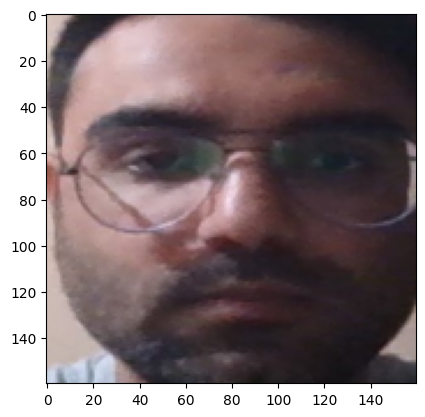

(160, 160, 3)


In [53]:
# load the photo and extract the face
pixels1 = extract_face(test1_path)
plt.imshow(pixels1)
plt.show()
print(pixels1.shape)

1/1 [==============================] - 0s 137ms/step


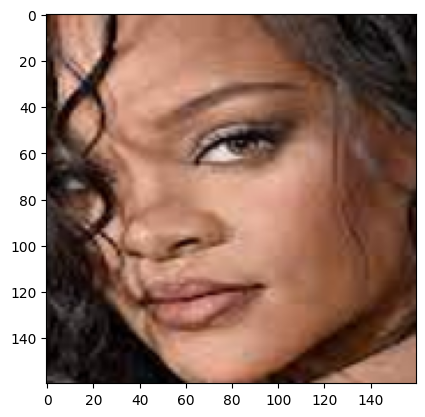

(160, 160, 3)


In [54]:
pixels2 = extract_face(test2_path)
plt.imshow(pixels2)
plt.show()
print(pixels2.shape)

In [55]:
y_hat1 = get_embedding(model, pixels1)
y_hat1

1/1 [==============================] - 0s 70ms/step


array([ 0.6858491 , -0.9852629 ,  1.2211568 ,  0.2535024 , -0.7820922 ,
        1.7504956 ,  0.60484105, -1.9516032 ,  0.46826062,  0.60892695,
       -0.5107453 ,  0.82981616, -1.2891431 ,  0.15092728, -1.6969236 ,
       -0.18288414,  1.4866866 ,  0.8908112 ,  0.5501538 , -0.12582268,
       -0.04158155, -0.32430547,  1.7392046 , -1.1015625 ,  0.4407982 ,
       -0.06774604, -0.06293665, -1.347319  , -0.05650835, -0.25108126,
        0.74590516, -0.6379476 , -0.08866809,  0.2981032 ,  0.49790162,
        0.15386985, -0.9994716 ,  0.2883823 , -0.53198385, -0.78524566,
       -0.5859479 , -1.4630954 ,  1.4845085 ,  2.821594  ,  1.9539118 ,
       -1.7609552 ,  0.1624969 ,  0.20397146, -0.5145679 ,  1.5610424 ,
        0.1908046 , -2.3134756 , -1.2252578 , -1.7811464 ,  0.2662407 ,
        0.6402    ,  0.37654012,  1.5516108 ,  0.36473814, -1.5556297 ,
       -1.5845444 , -0.9907734 ,  0.04222902, -0.6255833 , -0.83053285,
        1.0206957 , -1.876361  ,  0.23391202, -1.0997474 , -0.20

In [56]:
y_hat2 = get_embedding(model, pixels2)
y_hat2

1/1 [==============================] - 0s 85ms/step


array([-0.35270375, -0.01975831, -0.34981027,  1.0772551 ,  1.2065396 ,
       -0.03430897,  0.29241315,  0.23773533, -0.6915648 , -1.3924665 ,
       -0.7447986 , -0.4998403 , -1.3504841 ,  1.7440087 , -0.99347055,
       -0.19763017,  1.4029291 , -0.44779295,  0.95312035, -1.0254152 ,
       -0.19502169,  0.8181536 , -0.75776076, -1.1091882 ,  0.7905507 ,
        1.6270956 , -1.6452463 ,  0.8929131 ,  1.7291498 , -0.68475693,
        1.9326553 , -0.02409838, -0.9991741 ,  1.0835713 ,  1.3436396 ,
       -0.00340661,  0.8090939 ,  0.27459803,  0.8343266 ,  0.790298  ,
       -0.94194514,  1.8253274 ,  0.6946894 ,  0.02059177,  1.4164426 ,
        2.1718256 , -0.59381837,  1.4955543 ,  1.1205349 ,  0.931098  ,
        0.6470752 ,  0.88249433,  0.9675147 ,  0.12214615, -0.40040553,
        0.8391699 ,  0.3024427 , -0.10781136,  1.1891903 ,  0.7487518 ,
       -0.5361585 ,  1.2083507 , -1.7200716 ,  0.13700037, -1.2482518 ,
        1.0058341 ,  0.4788666 ,  0.07177106,  0.49784708, -0.04

In [59]:
dist = np.linalg.norm(y_hat1 - y_hat2)

In [60]:
dist

16.81654